<a href="https://colab.research.google.com/github/YukiAoki-GU/IoT_for_beginners/blob/main/Docker%E5%85%A5%E9%96%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Docker Engineのインストール

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('X_BsnODkq_Y', width=400, height=300)


[UbuntuにDocker Engineをインストール](https://matsuand.github.io/docs.docker.jp.onthefly/engine/install/ubuntu/)しましょう。Ubuntuでのパッケージ導入には
```
sudo apt install パッケージ名
```
を使うのが一般的な方法ですが，
```
sudo apt install docker-engine
```
をしてもパッケージは見つかりません。理由は，/etc/apt/sources.listにDockerリポジトリがセットアップされていないためです。Dockerリポジトリを追加すれば良いのですが，Raspberian OSは該当するリポジトリがありません。そのため，GitHub上の[スクリプト](https://get.docker.com/)を使ったインストールが必要になります。以下を実行してください
```
curl -fsSL https://get.docker.com -o get-docker.sh
sh ./get-docker.sh
```

注意)ここで，以下のコマンドでdockerがきちんと起動しているかどうかを確認してください。
```
systemctl status docker
```
動いていない場合，以下でdockerデーモンの再起動をしましょう。
```
sudo systemctl restart docker
```

インストール後，バージョンを確認してみましょう。
```
docker -v
```

hello-worldを動かしてみましょう。
```
sudo docker run hello-world
```
以下のメッセージが出てくればOKです。
```
Hello from Docker!
This message shows that your installation appears to be working correctly.
```

最後に，一般ユーザーでdockerコマンドを打てるようにしましょう。以下のコマンドで現在のユーザーをdockerグループに追加します。
```
sudo usermod -aG docker $USER
```

----
# Dockerの使い方

# 例1)Ubuntu20.04のイメージを動かしてみる
Ubuntu 20.04のイメージをダウンロード
```
docker image pull ubuntu:20.04
```
ダウンロードしたイメージを確認
```
docker image ls
```

ダウンロードしたubuntu:20.04のイメージをubuntu-testというコンテナ名として起動\
-it：いつも付ける！\
-d: デタッチドモード(バックグラウンドで動く)\
--name ubuntu-test: "ubuntu-test"というコンテナ名にする 

```
docker run -itd --name ubuntu-test ubuntu:20.04
```

起動したコンテナの確認
```
docker container ls
```

bashでコンテナに入る
```
docker exec -it ubuntu-test /bin/bash
```

コンテナを止める
```
docker container stop ubuntu-test
```
コンテナを捨てる
```
docker container rm ubuntu-test
```

---
#例2) Node-RedのDockerイメージを動かしてみる
Node-Redイメージをダウンロード
```
docker image pull nodered/node-red
```


外部から1881にアクセスすると1880にフォワードして立ち上げる\
ホストのnode_red_dataをDockerの/dataにマウント
```
docker run -it -p 1881:1880 -v node_red_data:/data --name mynodered nodered/node-red
```

ブラウザからIP:1881で動作確認\
バッシュでコンテナに入るには
```
docker exec -it mynodered /bin/bash
```

ボリュームを確認するには
```
docker volume ls
```
この状態のコンテナをイメージとして保存するには\
コンテナIDが"939191d54a40"を node-redというイメージ名，TAGを0.1で保存
```
docker commit 939191d54a40 node-red:0.1
```

コンテナの停止
```
docker container stop mynodered
```
コンテナの削除
```
docker container rm mynodered
```

---
#例3)nginxのDockerイメージを動かしてみる
nginxイメージをダウンロード
```
docker image pull nginx
```
外部から8888にアクセスしたらnginxの80に繋がる

```
docker run -itd -p 8888:80 --name nginx nginx
```
ip:8888でnginxのトップ画面が出ることを確認

以下でNode-redを立ち上げ\
```
docker run -itd -p 1881:1880 -v node_red_data:/data --name mynodered node-red:0.1
```
nginxのリバースプロキシを使ってnode-redにアクセス

```
docker exec -it nginx /bin/bash
apt update
apt install -y vim
vi /etc/nginx/conf.d/vhost.conf
```

```
server {
    listen 80;
    server_name test.aoki-rp;
 
    location / {
      root /var/test;
      index index.html
    }
}
```
Docker内でnginxの再起動
```
service nginx reload
```



----
#Docker Composeのインストール
```
sudo pip3 install docker-compose
```
以下のエラーが発生
```
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-server 2.18.0 requires jsonschema>=4.17.3, but you have jsonschema 3.2.0 which is incompatible.
```

```
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
docker-compose 1.29.2 requires jsonschema<4,>=2.5.1, but you have jsonschema 4.17.3 which is incompatible.
```

```
sudo pip3 install docker-compose
```


---
#例4)Nginxでリバースプロキシを行い，2つのNode-redを立ち上げる
以下のようなものを作りましょう。

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ctHGLlnC2eM', width=400, height=225)

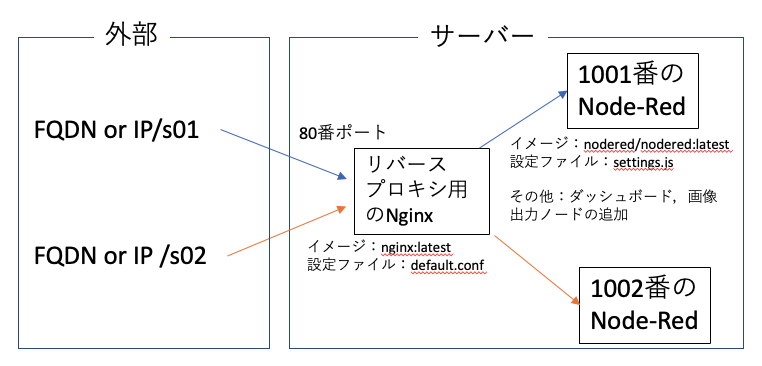

以下からダウンロード

```
git clone https://github.com/YukiAoki-GU/nginx-nr
```
ダウンロードしたディレクトリに移動
```
cd nginx-nr
```
以下のコマンドでサービスを立ち上げる
```
docker-compose up --build
```
サービスを落とすには
```
docker-compose down --rmi all --volumes --remove-orphans
```

以下で，どのようなことを行なっているのかを，もう少し説明しております。

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('kX-SBXVEo6U', width=400, height=225)

---
#2023年３月３０日追記

Q. Node-redにブラウザからアクセスできるようにはなったのですが、しばらくすると、「サーバとの接続が切断されました: 再接続しています」と表示されます。また、デプロイはできるのですが、実行ボタン(ノードの左側についているボタン)がクリックできません。

解決法：\
nginxのdefault.confを修正しました。以下のコマンドでダウンロードし直して再実行してください。
```
git clone https://github.com/YukiAoki-GU/nginx-nr
```
以下，解説動画

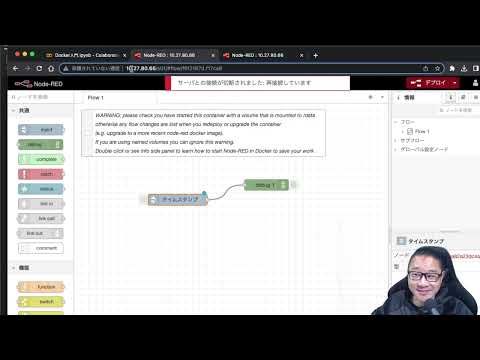

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('w3t4RRHH5P0', width=400, height=225)

---
Q. パスワードのハッシュ化についてS01/settings.jsの中のpasswordのハッシュ化方法について教えて頂けますでしょうか？

A. 以下のコマンド
```
node-red admin hash-pw
```

以下，解説動画

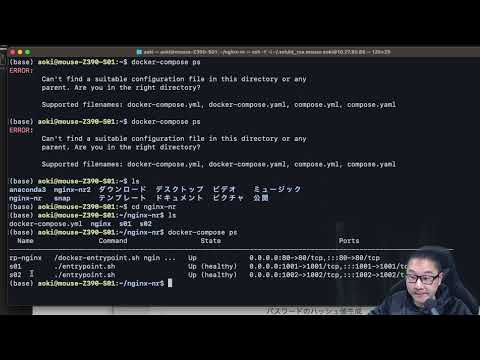

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('_IXFoOar3TA', width=400, height=225)

---
#2023年4月1日追記
##名前解決について


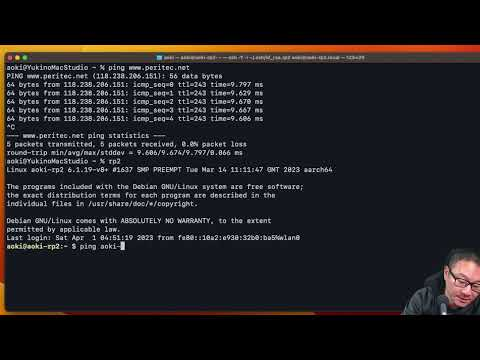

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('k03YbNNivLU', width=400, height=225)

---
##MQTTのパスワード設定とポート番号の変更について


In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('v97anwcB1uo', width=400, height=225)

mqttのDockerに入るには
```
docker exec -it mqtt sh
```
```
mosquitto_passwd -U password.txt
```

mosquittoのsubscriber
```
docker exec -it mqtt sh
mosquitto_sub -h 10.27.80.66/mqtt -t test -p 80 -u iot -P iot-school
```

mosquittoのpublisher
```
mosquitto_pub -h 10.27.80.66/mqtt -t test -m "hello world" -p 80 -u iot -P iot-school
```

---
#2023年4月8日追記

##node-red-contrib-teachable-machineのノードについて
Q. 以下のようにエラーが出る

A. ver. 1.4で追加されたlocal modeでエラーが発生している気がするので，ver 1.3に戻す。

(GitHub上のインストールスクリプトは修正しました。)

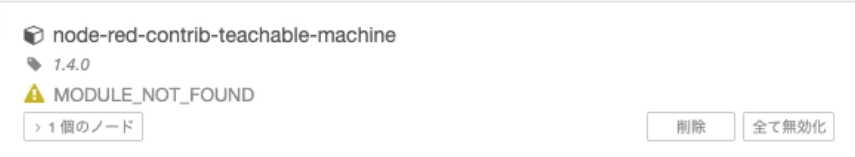

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('UPETgCN-GqM', width=400, height=225)

```
cd ~/.node-red
npm uninstall node-red-contrib-teachable-machine
npm install node-red-contrib-teachable-machine@1.3
sudo systemctl restart nodered
```

---
## teachable machineのローカルモードの対応について
Q. teachable machineをローカルモードで使うにはどうすればいいか？

A. ノードを自作するのが手っ取り早い

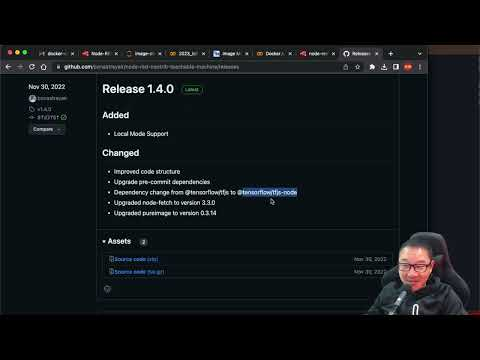

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('UPETgCN-GqM', width=400, height=225)

tensorflow用のモデルの中身を確認

https://netron.app/

```
cd ~/
sudo apt update -y
python3 -m pip install tflite-runtime
cd ~/.node-red
npm install python-shell@3.0.1
cd ~/
git clone 
cd .node-red
npm install ~/gu-iot-image-detection
sudo systemctl restart nodered
```

---
- nodeの作り方で参考にしたサイト

https://qiita.com/yasunari_matsuo/items/411affc9893211a9b523


- tensorflow liteの説明サイト

https://www.tensorflow.org/lite/guide/python?hl=ja

- 公式github上のラズパイ用の現在のコード

https://github.com/tensorflow/examples/blob/master/lite/examples/image_classification/raspberry_pi/classify.py

- 僕が取ってきたのは少し前で，以前は以下のようなコードだった気が，，，

https://gist.github.com/Namburger/ddf442c5f931cc5259d5f9a8b4a160e5

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('r3wF1UtIyJM', width=400, height=225)